In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt   #import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [1]:
# #df = pd.read_csv(r"/home/uia72388/Share_A/Analyse.csv")d
# df = pd.read_csv(r'/home/uia72388/Share_A/New Data/MYDATA.csv', index_col = 0)
# df.head()

In [3]:
#df['vdy.velocity'].to_csv(r'/home/uia72388/Share_A/New Data/vels.csv')

In [4]:
import statistics as st
st.median(df['vdy.yawRate'].dropna().values)

-3.2378498872276396e-05

# EDA

## Velocity Clusters

In [2]:
# vels = sorted(df['vdy.velocity'].dropna().values)
# vels = np.array(vels)
# vels

In [3]:
# vels = vels.reshape(-1,1)
# vels

In [92]:
from sklearn.neighbors.kde import KernelDensity
from matplotlib.pyplot import plot
%matplotlib inline

In [93]:
kde = KernelDensity(kernel='gaussian').fit(vels)  #bandwidth
s = np.linspace(-10,60)
s

array([-10.        ,  -8.57142857,  -7.14285714,  -5.71428571,
        -4.28571429,  -2.85714286,  -1.42857143,   0.        ,
         1.42857143,   2.85714286,   4.28571429,   5.71428571,
         7.14285714,   8.57142857,  10.        ,  11.42857143,
        12.85714286,  14.28571429,  15.71428571,  17.14285714,
        18.57142857,  20.        ,  21.42857143,  22.85714286,
        24.28571429,  25.71428571,  27.14285714,  28.57142857,
        30.        ,  31.42857143,  32.85714286,  34.28571429,
        35.71428571,  37.14285714,  38.57142857,  40.        ,
        41.42857143,  42.85714286,  44.28571429,  45.71428571,
        47.14285714,  48.57142857,  50.        ,  51.42857143,
        52.85714286,  54.28571429,  55.71428571,  57.14285714,
        58.57142857,  60.        ])

array([-54.01733664, -40.7439024 , -29.50571525, -20.29765785,
       -13.10983283,  -7.92367933,  -4.70571627,  -3.39085107,
        -3.73742177,  -4.35812376,  -4.23461424,  -4.13441975,
        -4.04893648,  -3.96588927,  -3.85401648,  -3.66477527,
        -3.51021717,  -3.36944326,  -3.24033284,  -3.38762979,
        -3.64934893,  -3.72129664,  -3.75086285,  -3.82455937,
        -3.71948748,  -3.69807339,  -3.89451146,  -4.03513326,
        -3.8377758 ,  -3.61067375,  -3.89663654,  -3.98413343,
        -3.73392354,  -3.56392156,  -3.81809584,  -4.3946793 ,
        -5.14114671,  -5.53171426,  -6.53578985,  -7.40149804,
        -8.24062481,  -8.94756176,  -8.77255782,  -8.85464168,
        -8.9594465 ,  -9.99581687, -12.77864573, -17.47950936,
       -24.15908533, -32.84497445])

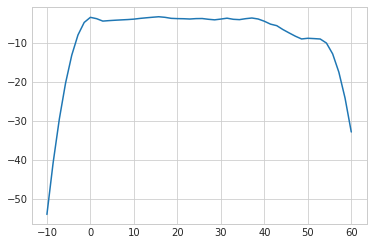

In [94]:
e = kde.score_samples(s.reshape(-1,1))
plot(s, e)
e

In [4]:
# from scipy.signal import argrelextrema
# import numpy as np
# mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]
# print( "Minima:", s[mi])
# print( "Maxima:", s[ma])

In [96]:
len(mi)

5

### Dividing muti-modal distribution into gaussian distributions

In [98]:
v1= vels[vels < s[mi[0]]]
v2 = vels[(vels >= s[mi[0]]) * (vels <= s[mi[1]])]
v3= vels[(vels >= s[mi[1]]) * (vels <= s[mi[2]])]
v4= vels[(vels >= s[mi[2]]) * (vels <= s[mi[3]])]
v5= vels[vels > s[mi[3]]]

In [99]:
len(v1), len(v2), len(v3),len(v4),len(v5), len(v1)+len(v2)+len(v3)+len(v4)+len(v5)

(19938, 94621, 24941, 23250, 30223, 192973)

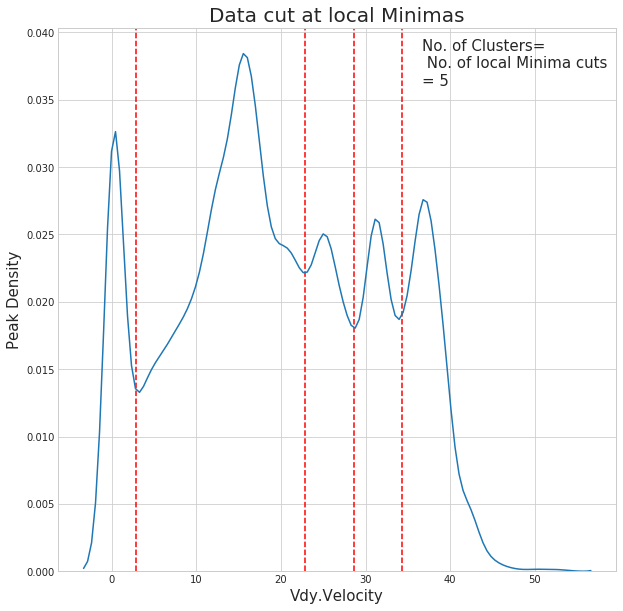

In [104]:
#fig=plt.figure()
plt.figure(figsize=(10,10))                 
plt.axvline(min(v2),linestyle='--',color='r')
plt.axvline(min(v3),linestyle='--',color='r')
plt.axvline(min(v4),linestyle='--',color='r')
plt.axvline(min(v5),linestyle='--',color='r')

sns.distplot(df['vdy.velocity'].dropna(), kde=True, hist=False)
plt.title("Data cut at local Minimas" , fontsize=20)
plt.xlabel('Vdy.Velocity', fontsize=15)
plt.ylabel('Peak Density', fontsize=15)
plt.figtext(0.63, 0.8, "No. of Clusters=\n No. of local Minima cuts\n= 5", fontsize=15)
plt.savefig('Peakclust1.jpg')
#plt.legend('No. of Peaks = No. of Clusters = 5')

### According to number of peaks

In [106]:
data = df['vdy.velocity'].values
from scipy.cluster.vq import kmeans,vq
centroids,labels = kmeans(data, len(mi) ) # len(mi) =5 (no. of peaks)
idx,_ = vq(data,centroids)

In [107]:
df2= pd.DataFrame({'idx':idx,'velocity':data})
df2.head()

,idx,velocity
0,4,14.076314
1,0,12.634358
2,4,13.949627
3,4,14.012307
4,4,13.885149


In [108]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192973 entries, 0 to 192972
Data columns (total 2 columns):
idx         192973 non-null int32
velocity    192973 non-null float64
dtypes: float64(1), int32(1)
memory usage: 2.2 MB


In [109]:
v1 = data[idx==0]
v2= data[idx==1]
v3= data[idx==2]
v4= data[idx==3]
v5= data[idx==4]
len(v1), len(v2), len(v3),len(v4),len(v5), len(v1)+len(v2)+len(v3)+len(v4)+len(v5)

(31609, 48039, 38661, 28096, 46568, 192973)

In [110]:
df2.idx.unique()

array([4, 0, 3, 1, 2])

In [111]:
# #0
# v1=[]
# for _,row in df2.iterrows():
#     if row['idx'] == 1:
#         v1.append(row['velocity'])

In [112]:
# #5
# v2=[]
# for _,row in df2.iterrows():
#     if row['idx'] == 0:
#         v2.append(row['velocity'])

In [113]:
# #13
# v3=[]
# for _,row in df2.iterrows():
#     if row['idx'] == 3:
#         v3.append(row['velocity'])


In [114]:
# v4=[]
# for _,row in df2.iterrows():
#     if row['idx'] == 2:
#         v4.append(row['velocity'])


In [115]:
# v5=[]
# for _,row in df2.iterrows():
#     if row['idx'] == 4:
#         v5.append(row['velocity'])


In [116]:
max(v1) , max(v2) , max(v3), max(v4) , max(v5)

(13.27114200592041,
 53.28174591064453,
 30.45715522766113,
 5.711805820465088,
 20.99913215637207)

In [117]:
import scipy.stats as stats
import math

In [118]:
stats.ttest_ind(v1, v2, equal_var =False)

Ttest_indResult(statistic=-1283.7624764570762, pvalue=0.0)

In [119]:
stats.ttest_ind(v1, v3, equal_var =False)

Ttest_indResult(statistic=-851.0173759411967, pvalue=0.0)

In [120]:
stats.ttest_ind(v1, v4, equal_var =False)

Ttest_indResult(statistic=499.4624909350337, pvalue=0.0)

In [121]:
stats.ttest_ind(v1, v5, equal_var =False)

Ttest_indResult(statistic=-435.21236696371597, pvalue=0.0)

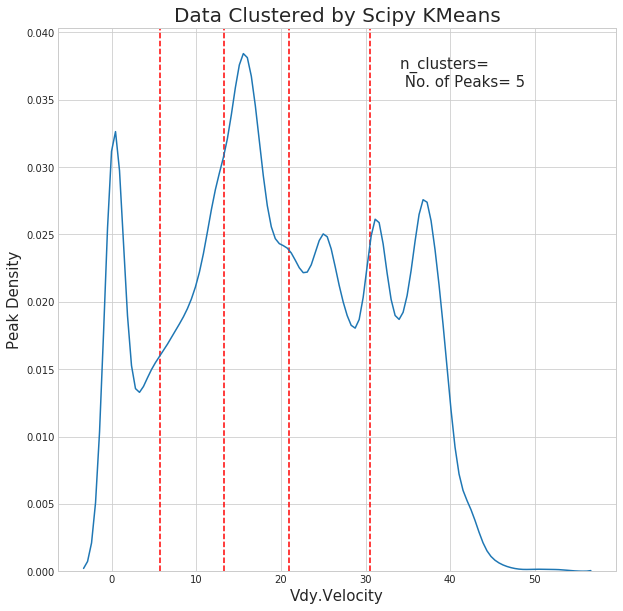

In [125]:
plt.figure(figsize=(10,10))         
plt.axvline(min(v1),linestyle='--',color='r')
plt.axvline(min(v2),linestyle='--',color='r')
plt.axvline(min(v3),linestyle='--',color='r')
#plt.axvline(min(v4),linestyle='--',color='r')
plt.axvline(min(v5),linestyle='--',color='r')
#plt.axvline(max(v5),linestyle='--',color='r')
 
sns.distplot(df['vdy.velocity'].dropna(), kde=True, hist=False)
plt.title("Data Clustered by Scipy KMeans" , fontsize=20)
plt.xlabel('Vdy.Velocity', fontsize=15)
plt.ylabel('Peak Density', fontsize=15)
plt.figtext(0.6, 0.8, "n_clusters= \n No. of Peaks= 5", fontsize=15)
plt.savefig('Peakclust2 (scipy kmeans).jpg')


In [104]:
len(v1)/128, len(v2)/128, len(v3)/128,len(v4)/128,len(v5)/128


(375.5859375, 246.34375, 219.2578125, 364.1796875, 302.234375)

In [120]:
y=[]
import random
c = 0
for i in v1:
    c+=1
    if c ==374:
        c=0
    else:
        continue
    y.append(i)

In [121]:
c = 0
for i in v2:
    c+=1
    if c ==244:
        c=0
    else:
        continue
    y.append(i)

In [122]:
c = 0
for i in v3:
    c+=1
    if c ==215:
        c=0
    else:
        continue
    y.append(i)
c = 0
for i in v4:
    c+=1
    if c ==364:
        c=0
    else:
        continue
    y.append(i)
c = 0
for i in v5:
    c+=1
    if c ==301:
        c=0
    else:
        continue
    y.append(i)    

In [123]:
len(y)

643

In [124]:
x= range(643)

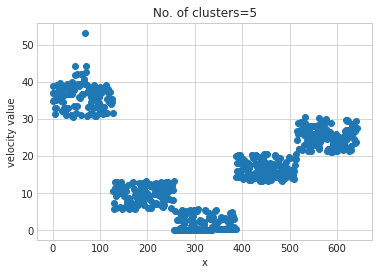

In [126]:
# plt.scatter(x= x, y=y)
# plt.title('No. of clusters=5')
# plt.xlabel('x')
# plt.ylabel('velocity value')
# plt.savefig('Peak_Clust (No. of peaks).jpg')

In [131]:
'''plt.figure(figsize=(10,10))
sns.distplot(v2)

pd.Series(v2).describe()'''


'plt.figure(figsize=(10,10))\nsns.distplot(v2)\n\npd.Series(v2).describe()'

In [132]:
len(v1)/128, len(v2)/128, len(v3)/128,len(v4)/128,len(v5)/131

(194.8515625, 236.1171875, 739.2265625, 181.640625, 152.19847328244273)

In [133]:
y=[]
import random
c = 0
for i in v1:
    c+=1
    if c ==194:
        c=0
    else:
        continue
    y.append(i)

In [134]:
c = 0
for i in v2:
    c+=1
    if c ==236:
        c=0
    else:
        continue
    y.append(i) 
c = 0
for i in v3:
    c+=1
    if c ==739:
        c=0
    else:
        continue
    y.append(i)
c = 0
for i in v4:
    c+=1
    if c ==181:
        c=0
    else:
        continue
    y.append(i)
c = 0
for i in v5:
    c+=1
    if c ==152:
        c=0
    else:
        continue
    y.append(i)
len(y)


643

In [135]:
x=[]
for i in range(643):   #len(y)=643
    x.append(i)   

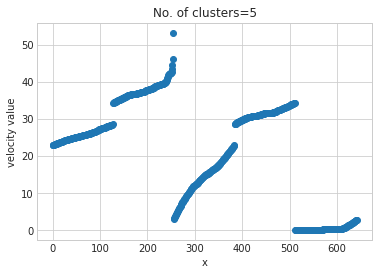

In [137]:
# plt.scatter(x= x, y=y)
# plt.title('No. of clusters=5')
# plt.xlabel('x')
# plt.ylabel('velocity value')
# plt.savefig('Peak_Clust (Peaks divided into Normal Dist).jpg')

In [57]:
import matplotlib.pyplot as plt

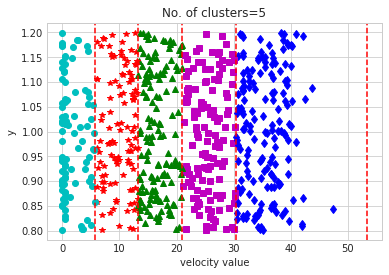

In [146]:
# import random
# c = 0
# for row in df2.iterrows():
#     c+=1
#     if c ==300:
#         c=0
#     else:
#         continue
#     y = random.uniform(0.8,1.2)
#     if row[1]['idx'] == 0:
#         plt.plot([row[1]['velocity']],[y],'r*')
#     if row[1]['idx'] == 1:
#         plt.plot([row[1]['velocity']],[y],'bd')
#     if row[1]['idx'] == 2:
#         plt.plot([row[1]['velocity']],[y],'g^')
#     if row[1]['idx'] == 3:
#         plt.plot([row[1]['velocity']],[y],'co')
#     if row[1]['idx'] == 4:
#         plt.plot([row[1]['velocity']],[y],'ms')  

# plt.axvline(30.447917938232425,linestyle='--',color='r')
# plt.axvline(20.984045028686523,linestyle='--',color='r')
# plt.axvline(5.700206279754639,linestyle='--',color='r')
# plt.axvline(13.254287719726562,linestyle='--',color='r')
# plt.axvline(53.28174591064453,linestyle='--',color='r')  

# plt.title('No. of clusters=5')
# plt.xlabel('velocity value')
# plt.ylabel('y')
# plt.savefig('Peak_Clust (No. of peaks)2.jpg')
# # X = df2.velocity.values.reshape(-1, 1)
# # Y = df2.idx.values

# # import sklearn as ske
# # from sklearn import svm
# # from mlxtend.plotting import plot_decision_regions
# # #C = 1.0  # SVM regularization parameter
# # clf = svm.SVC(kernel = 'linear')    #,  gamma=0.7, C=C 
# # clf.fit(X, Y)
# # plt.figure(figsize=(40,40))
# # plt.show()
# # plot_decision_regions(X, Y, clf=clf, legend=2)


In [ ]:
import random
c = 0
for row in df2.iterrows():
    c+=1
    if c ==300:
        c=0
    else:
        continue
    y = random.uniform(0.8,1.2)
    if row[1]['idx'] == 0:
        plt.plot([row[1]['velocity']],[y],'r*')
    if row[1]['idx'] == 1:
        plt.plot([row[1]['velocity']],[y],'bd')
    if row[1]['idx'] == 2:
        plt.plot([row[1]['velocity']],[y],'g^')
    if row[1]['idx'] == 3:
        plt.plot([row[1]['velocity']],[y],'co')
    if row[1]['idx'] == 4:
        plt.plot([row[1]['velocity']],[y],'ms')  

plt.axvline(30.447917938232425,linestyle='--',color='r')
plt.axvline(20.984045028686523,linestyle='--',color='r')
plt.axvline(5.700206279754639,linestyle='--',color='r')
plt.axvline(13.254287719726562,linestyle='--',color='r')
plt.axvline(53.28174591064453,linestyle='--',color='r')  

plt.title('No. of clusters=5')
plt.xlabel('velocity value')
plt.ylabel('y')
plt.savefig('Peak_Clust (No. of peaks)2.jpg')
# X = df2.velocity.values.reshape(-1, 1)
# Y = df2.idx.values

# import sklearn as ske
# from sklearn import svm
# from mlxtend.plotting import plot_decision_regions
# #C = 1.0  # SVM regularization parameter
# clf = svm.SVC(kernel = 'linear')    #,  gamma=0.7, C=C 
# clf.fit(X, Y)
# plt.figure(figsize=(40,40))
# plt.show()
# plot_decision_regions(X, Y, clf=clf, legend=2)


In [158]:
svm = svm.SVC(C=0.5, kernel='linear')
svm.fit(X, Y)

#clf = svm.SVC(kernel = 'linear',  gamma=0.7, C=C )
# Plotting decision regions
plot_decision_regions(X, Y, clf=svm, legend=2)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
#plt.title('SVM on Iris')
plt.show()

AttributeError: 'SVC' object has no attribute 'SVC'

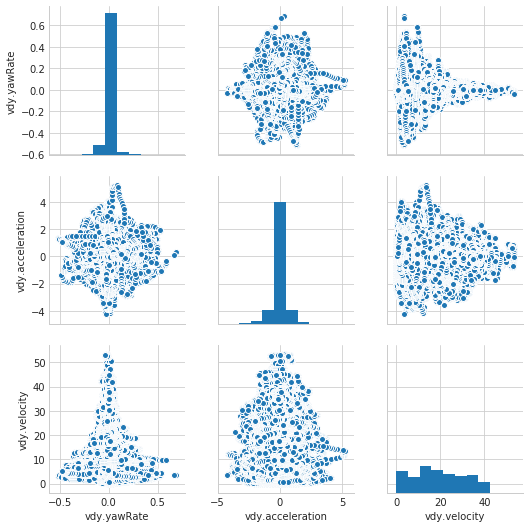

In [55]:
#g= sns.pairplot(vdy.dropna())

In [71]:
vdy.corr() #vdy.dropna().corr()

,vdy.yawRate,vdy.acceleration,vdy.velocity
vdy.yawRate,1.000000,0.013869,-0.017603
vdy.acceleration,0.013869,1.000000,-0.020814
vdy.velocity,-0.017603,-0.020814,1.000000


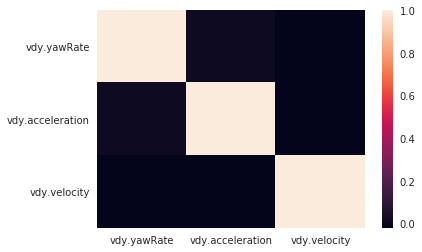

In [73]:
#sns.heatmap(vdy.dropna().corr())

In [86]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import scipy
from sklearn import svm


'''mu_vec1 = np.array([0,0])
cov_mat1 = np.array([[2,0],[0,2]])
x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1, 100)
mu_vec1 = mu_vec1.reshape(1,2).T # to 1-col vector

mu_vec2 = np.array([1,2])
cov_mat2 = np.array([[1,0],[0,1]])
x2_samples = np.random.multivariate_normal(mu_vec2, cov_mat2, 100)
mu_vec2 = mu_vec2.reshape(1,2).T'''


fig = plt.figure()




X = df2['velocity'].values.reshape(-1, 1)
Y = df2['idx'].values


clf = svm.SVC(kernel = 'linear')
clf.fit(X, Y)
plt.show()

<Figure size 432x288 with 0 Axes>

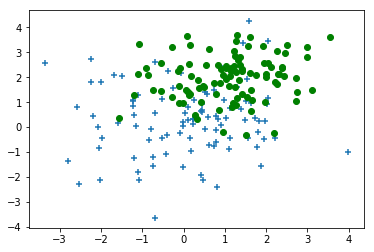

In [2]:
# # -*- coding: utf-8 -*-

# import numpy as np
# import matplotlib
# from matplotlib import pyplot as plt
# import scipy
# from sklearn import svm


# mu_vec1 = np.array([0,0])
# cov_mat1 = np.array([[2,0],[0,2]])
# x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1, 100)
# mu_vec1 = mu_vec1.reshape(1,2).T # to 1-col vector

# mu_vec2 = np.array([1,2])
# cov_mat2 = np.array([[1,0],[0,1]])
# x2_samples = np.random.multivariate_normal(mu_vec2, cov_mat2, 100)
# mu_vec2 = mu_vec2.reshape(1,2).T


# fig = plt.figure()


# plt.scatter(x1_samples[:,0],x1_samples[:,1], marker='+')
# plt.scatter(x2_samples[:,0],x2_samples[:,1], c= 'green', marker='o')

# plt.show()


In [3]:
x1_samples

array([[ 2.22414620e+00, -4.46091036e-01],
       [ 9.03042612e-01,  9.90865537e-02],
       [-5.28815053e-01, -4.27945227e-01],
       [ 7.35663160e-01, -7.46736670e-01],
       [ 1.96889071e+00,  2.58902992e-01],
       [-3.85272775e-01,  2.23691912e+00],
       [ 2.04423783e+00,  3.45501151e+00],
       [ 7.41873164e-01,  1.48695126e+00],
       [ 3.98691012e+00, -1.01640285e+00],
       [ 5.70972136e-01,  1.31214062e+00],
       [-4.02611452e-01, -3.04110891e-01],
       [ 7.85163376e-01,  4.62067201e-01],
       [ 2.25588427e-01,  3.37977129e-01],
       [ 3.62330537e-02,  5.50683769e-01],
       [ 1.12729392e+00,  7.53271876e-01],
       [ 6.05502153e-01, -7.40110125e-01],
       [-1.99042715e+00,  1.81161851e+00],
       [-8.49075280e-02, -2.40945076e-01],
       [ 2.01550779e+00,  9.07778158e-01],
       [ 1.87307146e+00, -1.55417017e+00],
       [-2.20513394e+00,  4.46397601e-01],
       [ 4.27138001e-01, -1.93021727e+00],
       [-7.31841667e-01, -1.55866695e+00],
       [-2.

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

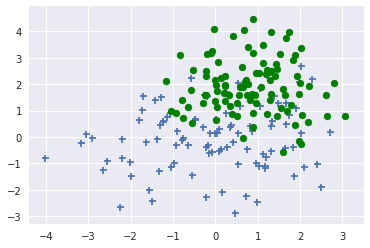

In [89]:
# # -*- coding: utf-8 -*-

# import numpy as np
# import matplotlib
# from matplotlib import pyplot as plt
# import scipy
# from sklearn import svm


# mu_vec1 = np.array([0,0])
# cov_mat1 = np.array([[2,0],[0,2]])
# x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1, 100)
# mu_vec1 = mu_vec1.reshape(1,2).T # to 1-col vector

# mu_vec2 = np.array([1,2])
# cov_mat2 = np.array([[1,0],[0,1]])
# x2_samples = np.random.multivariate_normal(mu_vec2, cov_mat2, 100)
# mu_vec2 = mu_vec2.reshape(1,2).T


# fig = plt.figure()


# plt.scatter(x1_samples[:,0],x1_samples[:,1], marker='+')
# plt.scatter(x2_samples[:,0],x2_samples[:,1], c= 'green', marker='o')

# X = np.concatenate((x1_samples,x2_samples), axis = 0)
# Y = np.array([0]*100 + [1]*100)

# C = 1.0  # SVM regularization parameter
# clf = svm.SVC(kernel = 'linear',  gamma=0.7, C=C )
# clf.fit(X, Y)